<a href="https://colab.research.google.com/github/izumipointer/2021-MSc-Exploratory-Data-Analysis/blob/main/ExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**texto en negrita**## Introduction

The data-set to be used can be downloaded from [here](https://drive.google.com/file/d/14qPoSicokjNTDgHUqLBiHD8gBC2JAEyJ/view?usp=sharing). 



> Download the data


The data set contains more of 10, 000 rows and more than 10 columns which contains features of the car such as Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG and  other properties of the car used to predict its price.

**Content**
Scraped from Edmunds and Twitter.


**Kaggle Objective**
Effects of features on the price
How does the brand affect the price?
What cars can be consider overpriced?
Price VS. popularity?

## 1. Importing the required libraries for EDA

> Bloc con sangría





```
# Esto tiene formato de código
```

Libraries used in order to perform EDA (Exploratory data analysis) in this tutorial:


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

*texto en cursiva*## 2. Upload the data

# To get or load the dataset into the notebook: 

At the left-hand side of the notebook, you will find a folder. When you click that you will find a tab with three options, you just have to select Files. 

One thing to remember in this step is that uploaded files will get deleted when this runtime is recycled.



```
# Esto tiene formato de código
```

## 3. Loading the data into the data frame.

[texto del vínculo](https://)Read the CSV into a data frame and pandas data frame does the job for us.

In [ ]:
df = pd.read_csv("data.csv")
# To display the top 10 rows 
df.head(10)   

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [ ]:
df.tail(5)                        # To display the botton 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995




```
# Esto tiene formato de código
```

## 4. Checking the types of data

In [ ]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

## 5. Dropping irrelevant columns

Just for example, the columns Engine Fuel Type, Market Category, Vehicle style, Popularity, Number of doors, Vehicle Size will be dropped for this instance.

In [ ]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(3)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350


## 6. Renaming the columns

In [ ]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(2)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650


## 7. Dropping the duplicate rows

In [ ]:
df.shape

(11914, 10)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 10)


In [ ]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
df.shape

(10925, 10)

## 8. Dropping the missing or null values.

In [ ]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

In [ ]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [ ]:
df = df.dropna()    # Dropping the missing values.
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

In [ ]:
print(df.isnull().sum())   # After dropping the values

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


## 9. Detecting Outliers

In [ ]:
df.dtypes

Make             object
Model            object
Year              int64
HP              float64
Cylinders       float64
Transmission     object
Drive Mode       object
MPG-H             int64
MPG-C             int64
Price             int64
dtype: object

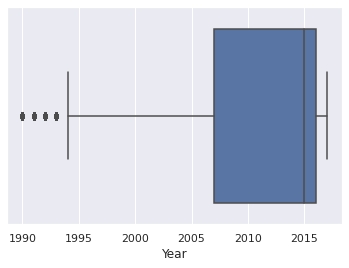

In [ ]:
sns.boxplot(x=df['Year'])

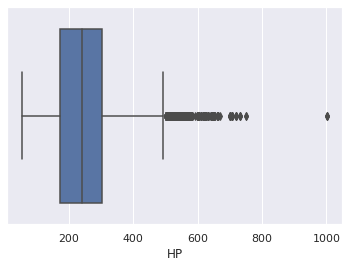

In [ ]:
sns.boxplot(x=df['HP'])

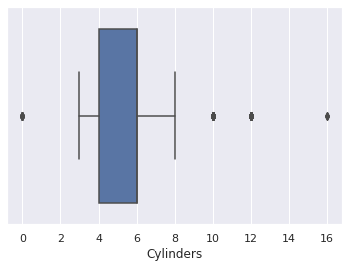

In [ ]:
sns.boxplot(x=df['Cylinders'])

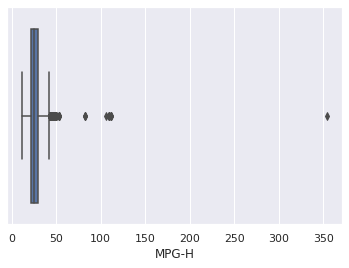

In [ ]:
sns.boxplot(x=df['MPG-H'])

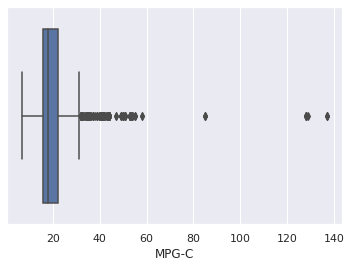

In [ ]:
sns.boxplot(x=df['MPG-C'])

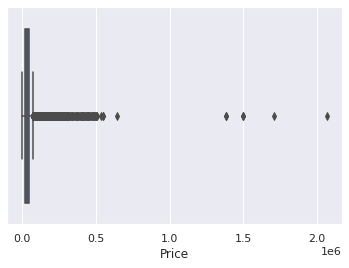

In [ ]:
sns.boxplot(x=df['Price'])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(9191, 10)

## 10. Descriptive Statistics

In [ ]:
df.mean()

Year          2011.328909
HP             236.735285
Cylinders        5.436514
MPG-H           26.432053
MPG-C           19.251877
Price        30976.473615
dtype: float64

In [ ]:
df.median()

Year          2015.0
HP             230.0
Cylinders        6.0
MPG-H           26.0
MPG-C           18.0
Price        29990.0
dtype: float64

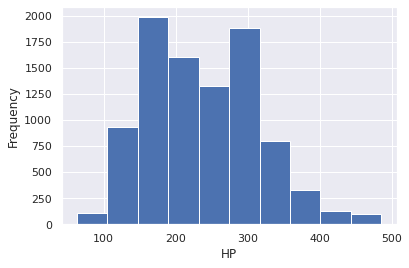

In [ ]:
hist, bin_edges = np.histogram(df.HP, bins=10)
hist
fig, ax = plt.subplots()
ax.hist(df.HP, bin_edges, cumulative=False)
ax.set_xlabel('HP')
ax.set_ylabel('Frequency')
plt.show()


## 11. Plotting

### Histogram

Histogram refers to the frequency of occurrence of variables in an interval. 

Example: Total number of car manufactured by a different company.

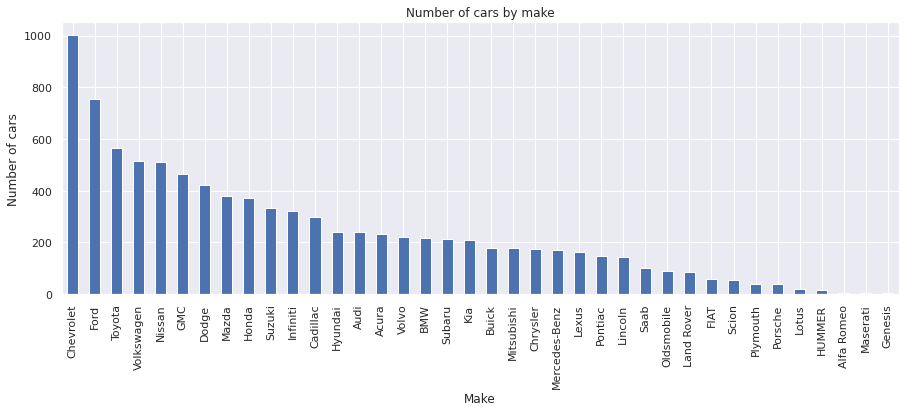

In [ ]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(15,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

### Heat Maps
Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size Horsepower, Year and Cylinders.

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG-H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


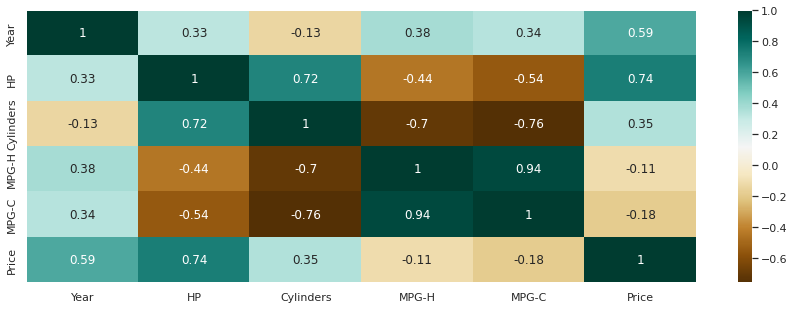

In [ ]:
plt.figure(figsize=(15,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

### Scatterplot

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

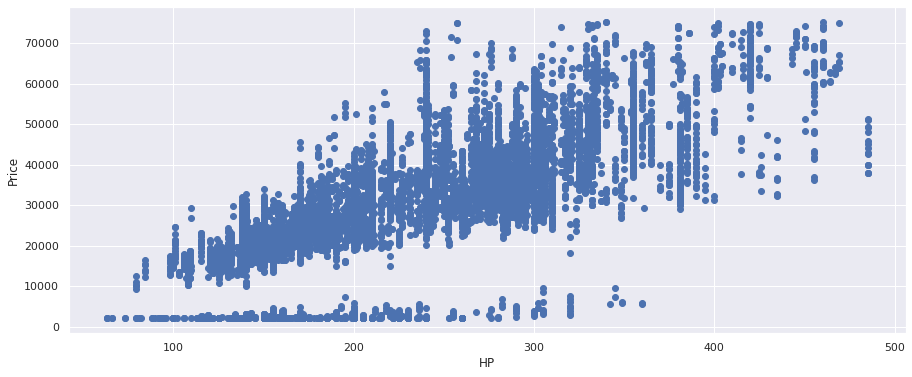

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()